In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# OpenWeather API Key
# api_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# # Starting URL for Weather MAP API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes:
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Group cities in sets of 50 for logging purposes:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=puerto%20colombia
Processing Record 2 of Set 1 | dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=dakar
Processing Record 3 of Set 1 | pampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=pampa
Processing Record 4 of Set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=ostrovnoy
Processing Record 5 of Set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=lebu
Processing Record 6 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=nikolskoye
Processing Record 7 of Set

Processing Record 4 of Set 2 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=grindavik
Processing Record 5 of Set 2 | nuoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=nuoro
Processing Record 6 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=hambantota
Processing Record 7 of Set 2 | kalengwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=kalengwa
Processing Record 8 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=new%20norfolk
Processing Record 9 of Set 2 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=kodiak
Processing Record 10 of Set 2 | umm kaddadah
http://api.openweathermap.org/data/2.5/

Processing Record 7 of Set 3 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=palmer
Processing Record 8 of Set 3 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=brae
Processing Record 9 of Set 3 | bhanvad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=bhanvad
Processing Record 10 of Set 3 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=havoysund
Processing Record 11 of Set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=mahebourg
Processing Record 12 of Set 3 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=mys%20shmidta
City not found. Skipping...
Processing Record 13 of Set 3 | yellowknife
http://api.open

Processing Record 9 of Set 4 | rasnov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=rasnov
Processing Record 10 of Set 4 | minab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=minab
Processing Record 11 of Set 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=georgetown
Processing Record 12 of Set 4 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=norman%20wells
Processing Record 13 of Set 4 | mainit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=mainit
Processing Record 14 of Set 4 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=faanui
Processing Record 15 of Set 4 | karaul
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 12 of Set 5 | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=sandnessjoen
Processing Record 13 of Set 5 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=lagoa
Processing Record 14 of Set 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=saldanha
Processing Record 15 of Set 5 | juarez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=juarez
Processing Record 16 of Set 5 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=ilulissat
Processing Record 17 of Set 5 | las palmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=las%20palmas
Processing Record 18 of Set 5 | purranque
http://api.openweathermap.org/data

Processing Record 15 of Set 6 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=saint-joseph
Processing Record 16 of Set 6 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=la%20ronge
Processing Record 17 of Set 6 | pangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=pangai
Processing Record 18 of Set 6 | canyon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=canyon
Processing Record 19 of Set 6 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=avera
Processing Record 20 of Set 6 | lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=lokosovo
Processing Record 21 of Set 6 | neiafu
http://api.openweathermap.org/data/2.5/weather?

Processing Record 19 of Set 7 | escarcega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=escarcega
Processing Record 20 of Set 7 | santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=santa%20cruz
Processing Record 21 of Set 7 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=sangar
Processing Record 22 of Set 7 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=salinopolis
Processing Record 23 of Set 7 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=saint%20anthony
Processing Record 24 of Set 7 | cravo norte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=cravo%20norte
Processing Record 25 of Set 7 | kalabo
http://api.op

Processing Record 22 of Set 8 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=wanning
Processing Record 23 of Set 8 | miyako
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=miyako
Processing Record 24 of Set 8 | tortoli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=tortoli
Processing Record 25 of Set 8 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=haibowan
City not found. Skipping...
Processing Record 26 of Set 8 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=kamenka
Processing Record 27 of Set 8 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=rundu
Processing Record 28 of Set 8 | yaan
http://api.openweathermap.org/dat

Processing Record 25 of Set 9 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=pangnirtung
Processing Record 26 of Set 9 | manggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=manggar
Processing Record 27 of Set 9 | toftir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=toftir
City not found. Skipping...
Processing Record 28 of Set 9 | kadoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=kadoma
Processing Record 29 of Set 9 | genoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=genoa
Processing Record 30 of Set 9 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=raudeberg
Processing Record 31 of Set 9 | vestmannaeyjar
http://api.open

Processing Record 28 of Set 10 | shchelyayur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=shchelyayur
City not found. Skipping...
Processing Record 29 of Set 10 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=sorland
Processing Record 30 of Set 10 | itupiranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=itupiranga
Processing Record 31 of Set 10 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=tessalit
Processing Record 32 of Set 10 | mutis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=mutis
Processing Record 33 of Set 10 | pocone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=pocone
Processing Record 34 of Set 10 | tiksi
http://api.

Processing Record 31 of Set 11 | spokane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=spokane
Processing Record 32 of Set 11 | arbon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=arbon
Processing Record 33 of Set 11 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=riyadh
Processing Record 34 of Set 11 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=belaya%20gora
Processing Record 35 of Set 11 | corn island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=corn%20island
Processing Record 36 of Set 11 | araceli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=araceli
Processing Record 37 of Set 11 | shimoda
http://api.openweathermap.org/dat

Processing Record 34 of Set 12 | artsyz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=artsyz
Processing Record 35 of Set 12 | penukonda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=penukonda
Processing Record 36 of Set 12 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=yumen
Processing Record 37 of Set 12 | zakharovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=zakharovo
Processing Record 38 of Set 12 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=san%20quintin
Processing Record 39 of Set 12 | freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=freeport
Processing Record 40 of Set 12 | tsurib
http://api.openweathermap.org/data

Processing Record 36 of Set 13 | salekhard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=salekhard
Processing Record 37 of Set 13 | san francisco menendez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=san%20francisco%20menendez
Processing Record 38 of Set 13 | balsas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=balsas
Processing Record 39 of Set 13 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9f35fc49f07f97c8f1c00888bfd0c93&q=araouane
----------------------------
Data Retrieval Complete     
----------------------------


In [5]:
# Convert array of JSONs into Pandas Dataframe
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

#Show Record Count
city_data_pd.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto colombia,40,CO,1538614800,88,10.99,-74.96,80.60,6.93
1,dakar,8,SN,1538614800,88,14.69,-17.45,82.40,6.93
2,pampa,1,US,1538618100,45,35.54,-100.96,85.64,14.99
3,ostrovnoy,0,RU,1538618886,87,68.05,39.51,22.73,10.09
4,lebu,20,ET,1538614800,76,8.96,38.73,51.80,4.70


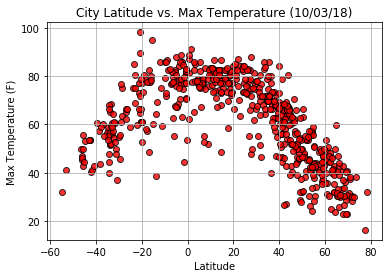

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="red",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
#plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

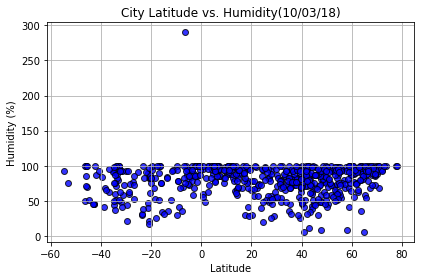

In [8]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
#plt.savefig("fig1.png")

# Show Plot
plt.tight_layout()
plt.show()

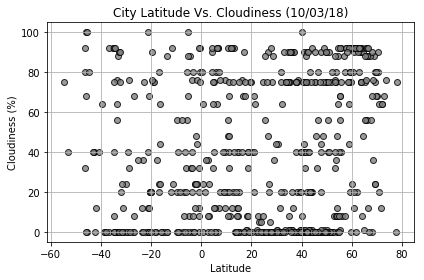

In [9]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
#plt.savefig("fig2.png")

#Show Plot
plt.tight_layout()
plt.show()

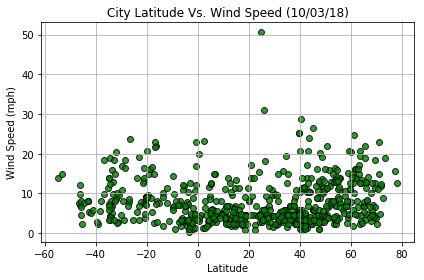

In [10]:
#Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            color="green",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
#plt.savefig("fig4.png")

#Show Plot
plt.tight_layout()
plt.show()